In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "bq_auth.json"

import datetime
import calendar
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import re

In [4]:
import bq_helper
from bq_helper import BigQueryHelper
# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package
stackOverflow = bq_helper.BigQueryHelper(active_project="krawling1111",
                                   dataset_name="stackoverflow")

In [3]:
bq_assistant = BigQueryHelper("bigquery-public-data", "stackoverflow")
bq_assistant.list_tables()

['badges',
 'comments',
 'post_history',
 'post_links',
 'posts_answers',
 'posts_moderator_nomination',
 'posts_orphaned_tag_wiki',
 'posts_privilege_wiki',
 'posts_questions',
 'posts_tag_wiki',
 'posts_tag_wiki_excerpt',
 'posts_wiki_placeholder',
 'stackoverflow_posts',
 'tags',
 'users',
 'votes']

In [20]:
bq_assistant.head("posts_questions", num_rows=20)

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count
0,47309613,Issue with the webpack-bundler,<p>I am trying to compile all my tsx files whi...,NaN,1,1,None,2017-11-15 14:11:29.557000+00:00,NaN,2017-11-15 14:23:45.703000+00:00,NaT,,NaN,,7614689,1,0,webpack,172
1,36953265,Reducing queries on Firebase,<p>I have the following problem:\nI have a lis...,NaN,0,3,None,2016-04-30 09:42:32.243000+00:00,NaN,2016-04-30 09:42:32.243000+00:00,NaT,,NaN,,5282695,1,0,javascript|firebase,40
2,35547622,Passing a Matrix from C++ to MATLAB,<p>I've reviewed questions with similar (almos...,NaN,0,7,None,2016-02-22 07:05:17.407000+00:00,NaN,2016-02-22 07:35:20.247000+00:00,2016-02-22 07:35:20.247000+00:00,,3855264.0,,3855264,1,1,c++|matlab|matrix,265
3,3474037,window.onload vs. body.onload vs. document.onr...,<p>What is the difference between <code>window...,3474078.0,1,5,None,2010-08-13 05:04:18.247000+00:00,14.0,2015-09-14 15:09:30.797000+00:00,2013-08-21 23:47:28.477000+00:00,,31671.0,,341144,1,73,javascript,65978
4,33749987,How to display two fragments vertically (maste...,<p>I'm trying to display information by select...,NaN,1,2,None,2015-11-17 05:46:14.160000+00:00,NaN,2015-11-17 06:38:25.550000+00:00,2015-11-17 06:38:25.550000+00:00,,4548981.0,,5548090,1,2,android|android-layout|listview|android-fragments,107
5,50017442,How to pass data from servlet to JSP without f...,<p>I am trying to pass the data from servlet t...,NaN,0,4,None,2018-04-25 08:27:23.120000+00:00,NaN,2018-04-25 08:38:25.220000+00:00,2018-04-25 08:38:25.220000+00:00,,4428158.0,,4428158,1,0,java|jsp|servlets|jstl,35
6,40508262,collection from customer model is not retrievi...,<p>i have created one custom front end module ...,40651321.0,1,0,None,2016-11-09 13:33:03.030000+00:00,NaN,2016-11-17 09:39:01.460000+00:00,2016-11-09 13:39:43.427000+00:00,,3395306.0,,3395306,1,1,collections|model|magento2,113
7,34119227,I need to generate and display a random number...,<p>I'm a student at a community college. The ...,NaN,0,0,None,2015-12-06 15:39:50.630000+00:00,NaN,2015-12-06 15:39:50.630000+00:00,NaT,,NaN,,4819316,1,1,java|android|random,41
8,49123760,Cannot resolve bundle style,<p>I'm trying to integrate Webpack into my Dja...,NaN,0,1,None,2018-03-06 05:08:36.857000+00:00,NaN,2018-03-06 05:08:36.857000+00:00,NaT,,NaN,,7583514,1,3,python|django|webpack,220
9,43436322,Python run set.intersection with set of sets a...,"<p>I am working with biological datasets, stra...",NaN,0,7,None,2017-04-16 10:40:34.117000+00:00,NaN,2017-04-16 11:27:41.397000+00:00,2017-04-16 11:27:41.397000+00:00,,7874166.0,,7874166,1,0,python-2.7,36


In [4]:
bq_assistant.head("posts_answers", num_rows=20)

,id,body,comment_count,community_owned_date,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags
0,17147316,<p>Attach the <code>Mylocation.txt</code> as r...,1,None,2013-06-17 12:18:56.827000+00:00,2013-06-17 12:18:56.827000+00:00,NaT,,NaN,,1124244,17143806,2,0,
1,36356211,<p>Templates must ideally be implemented inlin...,0,None,2016-04-01 12:20:55.963000+00:00,2016-04-01 12:20:55.963000+00:00,NaT,,NaN,,264325,36356136,2,1,
2,29997584,<p>You can do it by creating a json encoded re...,4,None,2015-05-02 02:07:12.093000+00:00,2015-05-02 02:07:12.093000+00:00,NaT,,NaN,,987447,29997439,2,1,
3,15701054,"<p>The ""classical"" Java problem also affects m...",1,None,2013-03-29 10:01:10.730000+00:00,2013-03-29 10:01:10.730000+00:00,NaT,,NaN,,1016146,2598009,2,1,
4,468912,"<p>Another alternative, if you know the time b...",0,None,2009-01-22 12:24:51.253000+00:00,2009-01-22 12:24:51.253000+00:00,NaT,,NaN,xan,15667,468779,2,1,
5,35976431,<p><code>sizeof()</code> gives you the size of...,4,None,2016-03-13 22:02:32.670000+00:00,2016-03-13 22:02:32.670000+00:00,NaT,,NaN,,3943312,35976374,2,2,
6,37534810,<p>The Phoenix.Presence docs are available her...,1,None,2016-05-30 23:34:30.030000+00:00,2016-05-30 23:34:30.030000+00:00,NaT,,NaN,,2355214,37532569,2,1,
7,49414118,<p>Try to store the indices and do the updatin...,1,None,2018-03-21 18:32:35.733000+00:00,2018-03-21 18:32:35.733000+00:00,NaT,,NaN,,3741892,49413782,2,2,
8,36524183,"<p>Your basic approach is correct, although I ...",6,None,2016-04-09 23:58:18.040000+00:00,2016-04-10 00:02:20.027000+00:00,2016-04-10 00:02:20.027000+00:00,,3973077.0,,3973077,36524123,2,1,
9,4049611,<blockquote>\n <p>Would not it be much more e...,0,None,2010-10-29 06:45:55.143000+00:00,2010-10-29 06:45:55.143000+00:00,NaT,,NaN,,191708,4049179,2,1,


In [32]:
query = """SELECT questions.score, questions.view_count, answers.score as ans_score, questions.creation_date, questions.tags,
            TIMESTAMP_DIFF(answers.creation_date, questions.creation_date, MINUTE) as TimeDiff
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions
    LEFT JOIN `bigquery-public-data.stackoverflow.posts_answers` answers ON questions.accepted_answer_id = answers.id
    WHERE EXTRACT(YEAR FROM questions.creation_date) >=2016 AND questions.accepted_answer_id IS NOT NULL
        """

In [33]:
bq_assistant.estimate_query_size(query)

1.4091843171045184

In [34]:
response = stackOverflow.query_to_pandas(query)

In [36]:
response.head(10)

,score,view_count,ans_score,creation_date,tags,TimeDiff
0,54,24645,108,2016-06-17 11:51:36.373000+00:00,angular|angular2-routing,0
1,7,5207,12,2016-03-13 23:07:48.857000+00:00,c#|.net|winforms|entity-framework|datagridview,176
2,10,4576,24,2016-06-21 11:56:37.690000+00:00,python|pandas|dataframe|redis,863
3,14,6953,19,2016-03-30 14:32:49.533000+00:00,c#|console|binary-tree,12671
4,8,1733,8,2017-01-19 01:41:42.253000+00:00,ios|swift|firebase|firebase-crash-reporting,12772
5,24,46820,46,2016-12-30 12:40:38.903000+00:00,angular|ionic2,9
6,13,2120,18,2016-06-30 09:01:00.913000+00:00,swift|initialization|lazy-initialization,22
7,8,1977,9,2017-11-30 22:56:36.830000+00:00,node.js|sdk|api.ai|dialogflow,7461
8,16,29043,38,2016-05-28 10:51:46.660000+00:00,data-binding|angular|angular2-template,34
9,7,1913,10,2017-01-03 15:02:12.307000+00:00,javascript|openlayers-3,358


In [12]:
response.to_csv("data.csv", index=False)

In [5]:
response = pd.read_csv("data.csv")

In [6]:
response.describe()

,score,view_count,ans_score,TimeDiff
count,2.589841e+06,2.589841e+06,2.589841e+06,2.589841e+06
mean,9.028994e-01,5.524078e+02,1.833895e+00,6.127232e+03
std,4.468586e+00,2.828174e+03,6.477772e+00,4.490455e+04
min,-6.500000e+01,3.000000e+00,-1.400000e+01,0.000000e+00
25%,0.000000e+00,5.000000e+01,0.000000e+00,1.100000e+01
50%,0.000000e+00,1.050000e+02,1.000000e+00,4.200000e+01
75%,1.000000e+00,3.490000e+02,2.000000e+00,3.520000e+02
max,2.267000e+03,6.427520e+05,3.108000e+03,1.395281e+06


In [7]:
response.shape

(2589841, 6)

In [8]:
response['creation_date'] = pd.to_datetime(response['creation_date'])

In [9]:
response['creation_date'] = response['creation_date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [10]:
response.tags = response.tags.fillna('NA')

In [11]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [12]:
add_datepart(response, 'creation_date')

In [13]:
response.head()

,score,view_count,ans_score,tags,TimeDiff,creation_Year,creation_Month,creation_Week,creation_Day,creation_Dayofweek,creation_Dayofyear,creation_Is_month_end,creation_Is_month_start,creation_Is_quarter_end,creation_Is_quarter_start,creation_Is_year_end,creation_Is_year_start,creation_Elapsed
0,54,24645,108,angular|angular2-routing,0,2016,6,24,17,4,169,False,False,False,False,False,False,1466164296
1,7,5207,12,c#|.net|winforms|entity-framework|datagridview,176,2016,3,10,13,6,73,False,False,False,False,False,False,1457910468
2,10,4576,24,python|pandas|dataframe|redis,863,2016,6,25,21,1,173,False,False,False,False,False,False,1466510197
3,14,6953,19,c#|console|binary-tree,12671,2016,3,13,30,2,90,False,False,False,False,False,False,1459348369
4,8,1733,8,ios|swift|firebase|firebase-crash-reporting,12772,2017,1,3,19,3,19,False,False,False,False,False,False,1484790102


In [14]:
tag_list = response.tags.apply(lambda x: x.split('|'))
array_list = np.array(tag_list)
flatten = lambda l: [item for sublist in l for item in sublist]
flat_list = flatten(array_list)
from collections import Counter
freq = Counter(flat_list)
sorted_x = sorted(freq.items(), key=lambda kv: kv[1],reverse=True)
pop_list= []
for i,j in sorted_x[:50]:
    pop_list.append(i)

In [15]:
response.TimeDiff.describe()

count    2.589841e+06
mean     6.127232e+03
std      4.490455e+04
min      0.000000e+00
25%      1.100000e+01
50%      4.200000e+01
75%      3.520000e+02
max      1.395281e+06
Name: TimeDiff, dtype: float64

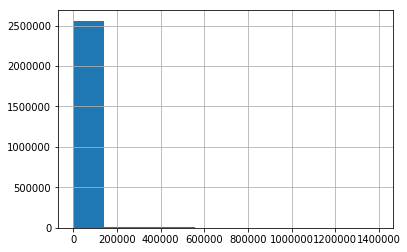

In [16]:
hist = response['TimeDiff'].hist()

In [17]:
bins = [-1, 6, 12, 24, 72, 168, response['TimeDiff'].max()]
group_names = list(range(6))
target = pd.cut(response['TimeDiff'], bins, labels=group_names)

In [46]:
y = response['TimeDiff'] <= 60
y = y.values
y

array([ True, False, False, ...,  True,  True,  True])

In [19]:
response.head()

,score,view_count,ans_score,tags,TimeDiff,creation_Year,creation_Month,creation_Week,creation_Day,creation_Dayofweek,creation_Dayofyear,creation_Is_month_end,creation_Is_month_start,creation_Is_quarter_end,creation_Is_quarter_start,creation_Is_year_end,creation_Is_year_start,creation_Elapsed
0,54,24645,108,angular|angular2-routing,0,2016,6,24,17,4,169,False,False,False,False,False,False,1466164296
1,7,5207,12,c#|.net|winforms|entity-framework|datagridview,176,2016,3,10,13,6,73,False,False,False,False,False,False,1457910468
2,10,4576,24,python|pandas|dataframe|redis,863,2016,6,25,21,1,173,False,False,False,False,False,False,1466510197
3,14,6953,19,c#|console|binary-tree,12671,2016,3,13,30,2,90,False,False,False,False,False,False,1459348369
4,8,1733,8,ios|swift|firebase|firebase-crash-reporting,12772,2017,1,3,19,3,19,False,False,False,False,False,False,1484790102


In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
response['tags'] = response.tags.str.split('|')
tags = response['tags'].apply(lambda x: list(set(x) & set(pop_list)))
mlb = MultiLabelBinarizer()
tag = pd.DataFrame(mlb.fit_transform(tags), columns=mlb.classes_, index = tags.index)

In [21]:
tag.shape

(2589841, 50)

In [22]:
df = pd.concat([response, tag], axis=1)

In [23]:
df = df.drop(columns=['TimeDiff', 'tags'])

In [24]:
# one-hot encoding categorical variables
X = pd.get_dummies(df).values
X

array([[54, 24645, 108, ..., 0, 0, 0],
       [7, 5207, 12, ..., 0, 0, 0],
       [10, 4576, 24, ..., 0, 0, 0],
       ...,
       [-1, 62, -1, ..., 0, 0, 0],
       [-1, 68, -1, ..., 0, 0, 0],
       [-1, 113, -1, ..., 0, 0, 0]], dtype=object)

In [25]:
y = np.array(target.values)
y

array([0, 5, 5, ..., 0, 3, 3], dtype=int64)

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 516)

In [48]:
y_train

array([False, False,  True, ..., False,  True, False])

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# A parameter grid for XGBoost
params = {
    'min_child_weight':list(range(3,9,1)), 
    'max_depth': list(range(3,9,1)),
    'learning_rate': [0.05, 0.1],
    'gamma':[0, 0.05],  
    'subsample':[0.8],
    'colsample_bytree':[0.8], 
    'n_estimators': [100, 300]
}

#dtrain = xgb.DMatrix(X_train, y_train)

# Initialize XGB and GridSearch
gbm = xgb.XGBClassifier(silent=False, objective='binary:hinge', tree_method='gpu_hist')

In [ ]:
grid = GridSearchCV(gbm, params, verbose=True, n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

Bayesian Optimization

In [49]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [50]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, subsample, eta):
    params = {'eval_metric': 'logloss',
              'tree_method': 'gpu_hist',
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize
    return -1.0 * cv_result['test-logloss-mean'].iloc[-1]

In [51]:
from bayes_opt import BayesianOptimization

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                             'subsample':(0.3, 0.9),
                                             'eta': (0, 0.1)
                                            })
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=10, n_iter=50, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.6174   |  0.6958   |  0.06922  |  0.3503   |  3.111    |  0.81     |
|  2        | -0.6038   |  0.6576   |  0.0933   |  0.5      |  5.39     |  0.3697   |
|  3        | -0.6167   |  0.6065   |  0.04935  |  0.7095   |  4.981    |  0.7376   |
|  4        | -0.6507   |  0.3901   |  0.0116   |  0.007732 |  5.163    |  0.5002   |
|  5        | -0.6391   |  0.6496   |  0.01333  |  0.9662   |  5.098    |  0.5158   |
|  6        | -0.6012   |  0.7284   |  0.09524  |  0.4521   |  6.185    |  0.5168   |
|  7        | -0.632    |  0.7145   |  0.02899  |  0.3025   |  3.619    |  0.3039   |
|  8        | -0.6179   |  0.3737   |  0.05266  |  0.3432   |  4.119    |  0.3043   |
|  9        | -0.6108   |  0.3735   |  0.07858  |  0.8839   |  4.911    |  0.682    |
|  10       | -0.6182   |  0.7247   |  0.02645  |  0.0

|  58       | -0.601    |  0.819    |  0.09961  |  0.9573   |  6.948    |  0.3255   |
|  59       | -0.6008   |  0.8729   |  0.09989  |  0.5941   |  6.347    |  0.6978   |
|  60       | -0.6017   |  0.6802   |  0.09998  |  0.6822   |  6.078    |  0.3025   |


In [53]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=-1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.3, tree_method='gpu_hist')
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=0.3, tree_method='gpu_hist')

In [54]:
y_train_pred = xgb_best.predict(X_train)

c:\users\kai\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
y_train_pred

array([False, False, False, ...,  True,  True, False])

[8.4995486e-02 1.7999861e-01 7.8787036e-02 7.5983969e-03 1.2718049e-02
 3.9659925e-02 8.7358400e-02 5.5412699e-02 8.7566890e-02 2.3397503e-03
 4.8648272e-04 1.0192972e-03 9.0346794e-04 1.8532676e-04 1.6216091e-04
 1.1309565e-01 1.5984433e-03 1.8764334e-03 1.0494128e-02 4.7258320e-03
 4.6100030e-03 5.9767878e-03 2.9420622e-03 2.0617601e-03 2.4555796e-03
 3.7760327e-03 9.5443279e-03 6.8802559e-03 7.3204068e-03 3.8918618e-03
 3.6370375e-03 1.3899506e-03 2.9883939e-03 1.0053976e-02 4.8184958e-03
 1.1675585e-02 1.9783631e-02 8.6408602e-03 4.3320130e-03 3.3127158e-03
 3.1505548e-03 4.2161834e-03 7.5983969e-03 4.1235201e-03 4.6100030e-03
 9.6833231e-03 3.1505548e-03 1.3876340e-02 1.6911066e-03 3.3127158e-03
 4.3320130e-03 3.6602034e-03 3.5907058e-03 2.4324136e-03 3.7991984e-03
 2.0385943e-03 1.8995992e-03 6.7180949e-03 3.7528668e-03 2.8262329e-03
 4.0076911e-03 2.1775893e-03 3.1505548e-03 2.0154284e-03 3.0115598e-03
 4.1003544e-03]


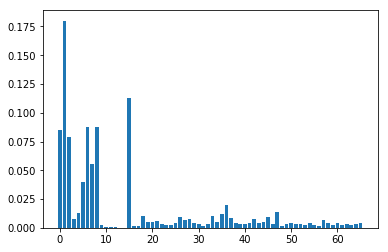

In [56]:
# feature importance
print(xgb_best.feature_importances_)

# plot
plt.bar(range(len(xgb_best.feature_importances_)), xgb_best.feature_importances_)
plt.show()

In [57]:
y_test_pred = xgb_best.predict(X_test)

c:\users\kai\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[141009,  87860],
       [ 78194, 210906]], dtype=int64)

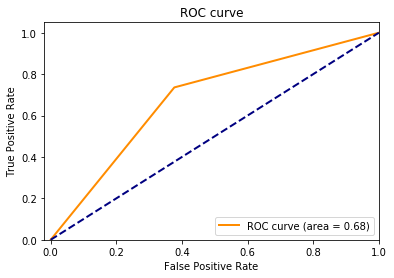

In [59]:
from sklearn.metrics import roc_curve, auc
# Compute micro-average ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

LASSO

In [41]:
from sklearn import linear_model
lassoCV = linear_model.LassoCV(cv=10, random_state=123, n_jobs=-1,max_iter=100000, normalize=True)
lassoCV.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=-1, normalize=True,
    positive=False, precompute='auto', random_state=123,
    selection='cyclic', tol=0.0001, verbose=False)

In [42]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassoCV.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.1505016420194474, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
y_train_pred = lasso.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(y_train_pred, y_train))
train_rmse

30255.538979871922

In [44]:
y_test_pred = lasso.predict(X_test)
test_rmse = math.sqrt(mean_squared_error(y_test_pred, y_test))
test_rmse

30109.714616227866